# Muliti-molecule mol2 reader using RDKit

In [1]:
import os
import pandas as pd

from rdkit import Chem
from rdkit.Chem import Draw,AllChem
from rdkit.Chem.Draw import IPythonConsole

In [2]:
# converts each text block into an RDKit molecule type molecule by using the Chem.MolFromMol2Block() of RDKit

def Mol2MolSupplier(file=None,sanitize=True):
    mols=[]
    
    with open(file, 'r') as f:
        line =f.readline()
        while not f.tell() == os.fstat(f.fileno()).st_size:
            if line.startswith("@<TRIPOS>MOLECULE"):
                mol = []
                mol.append(line)
                line = f.readline()
                while not line.startswith("@<TRIPOS>MOLECULE"):
                    mol.append(line)
                    line = f.readline()
                    if f.tell() == os.fstat(f.fileno()).st_size:
                        mol.append(line)
                        break
                mol[-1] = mol[-1].rstrip() # removes blank line at file end
                block = ",".join(mol).replace(',','')
                m = Chem.MolFromMol2Block(block,sanitize=sanitize)
            mols.append(m)
    return(mols)

In [3]:
file_path = 'test.mol2'

In [4]:
database=Mol2MolSupplier(file_path,sanitize=True)

UnboundLocalError: local variable 'm' referenced before assignment

In [5]:
with open('test.mol2','r') as f:
    print(os.fstat(f.fileno()).st_size)

48332


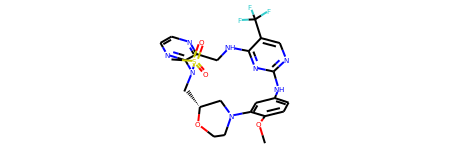

In [6]:
from rdkit.Chem.rdmolfiles import MolFromMol2File, MolFromMol2Block
mols = MolFromMol2File('test.mol2')
mols

In [7]:
mols = MolFromMol2Block('test.mol2')
type(mols)

NoneType

In [8]:
file_path = 'test.mol2'
mol2bloks = []
all_names = []
with open(file_path, 'r') as f:
    s = ""
    while True:
        line = f.readline()
        if not line:
            mol2bloks.append(s)
            break
        elif line[0] == "#":
            pass
        elif (line == "@<TRIPOS>MOLECULE\n") and (s != ""):
            mol2bloks.append(s)
            # print("mol2bloks: ",mol2bloks)
            s = ""
            f.seek(f.tell() - len(line))
        else:
            s = s + line
            if s.endswith("@<TRIPOS>MOLECULE\n"):
                name = f.readline()
                # print("name: ",name)
                all_names.append(name.strip())
                f.seek(f.tell() - len(name))

In [9]:
len(mol2bloks)

7

In [10]:
all_names

['r3_gen_90025',
 'r3_gen_9004',
 'r3_gen_90097',
 'r3_gen_90310',
 'r3_gen_90373',
 'r3_gen_90392',
 'r3_gen_9045']

In [11]:
mols = [Chem.MolFromMol2Block(i) for i in mol2bloks]
mols

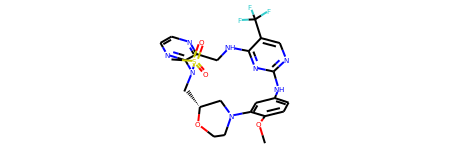

In [13]:
mols[0]